# Prediction of Breast Cancer using Supervised Machine Learning Techniques

The python program classifies whether the patient is suffering from Breast cancer or not (malignant or benign tumour) based on the training done on the training dataset.

In [0]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from keras import Sequential
from keras.layers import Dense, Dropout
from fastai import *
from fastai.tabular import * 
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statistics import mean
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.utils import shuffle
# ignore warnings faced due to usage of old version of tensorflow
warnings.simplefilter('ignore')

Breast Cancer Wisconsin (Diagnostic) Dataset (WDBC) is used.

The dataset used is open source and is widely used.

Dataset available @ - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Dataset characteristics

Datset contains 569 samples with 33 columns.

In [110]:
# loading breast cancer dataset - Breast Cancer Wisconsin (Diagnostic) Data Set
# dataset source - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# dataframe creation from dataset
df = pd.read_csv("/content/drive/My Drive/Python Project data/BDMH_Project/wdbc.csv")
# drop last column as it is verbose
df.drop(df.columns[-1], axis=1, inplace=True)
# drop 1st column as contains ID which is not of significance
df.drop(df.columns[0], axis=1, inplace=True)
# print first 5 rows of dataset dataframe
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Data visualization** is done to count the total number of samples classified as malignant and benign.

*With the help of the plot* we analyzed that we have **212 samples for benign tumour and 357 samples for malignant tumour** which means **we have a balanced dataset which will help to achieve high accuracies.**

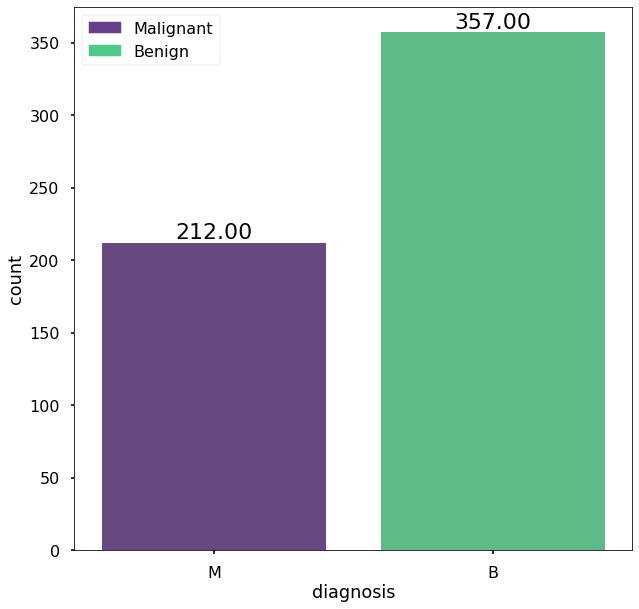

In [111]:
# plot of count of each class samples
plt.figure(figsize=(10, 10))
count_plot = sns.countplot(x=df.diagnosis, data=df, palette=["#67408B", "#4FCA88"])
# custom legend
first_patch = mpatches.Patch(color='#67408B', label='Malignant')
second_patch = mpatches.Patch(color='#4FCA88', label='Benign')
# annotation of y axis value on top of bar
for p in count_plot.patches:
  count_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend(handles=[first_patch, second_patch], loc='upper left')
# graph plot
plt.show()

Out of the 33 columns, we can analyze that the columns that can act as features for the purpose of classification are **30 columns which are feature columns**.

In [112]:
# dataframe containing features of dataset
feature_df = df.iloc[:, 1:]
feature_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To analyze the important information about the feature columns.

In [113]:
# analysis of features
feature_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Analysis of Mean Features** out of all the available features.

In [0]:
# list of mean features
mean_features = list(df.columns[1:12])

**Correlation analysis** between mean features. This is done to analyze which feature is correlated to which.

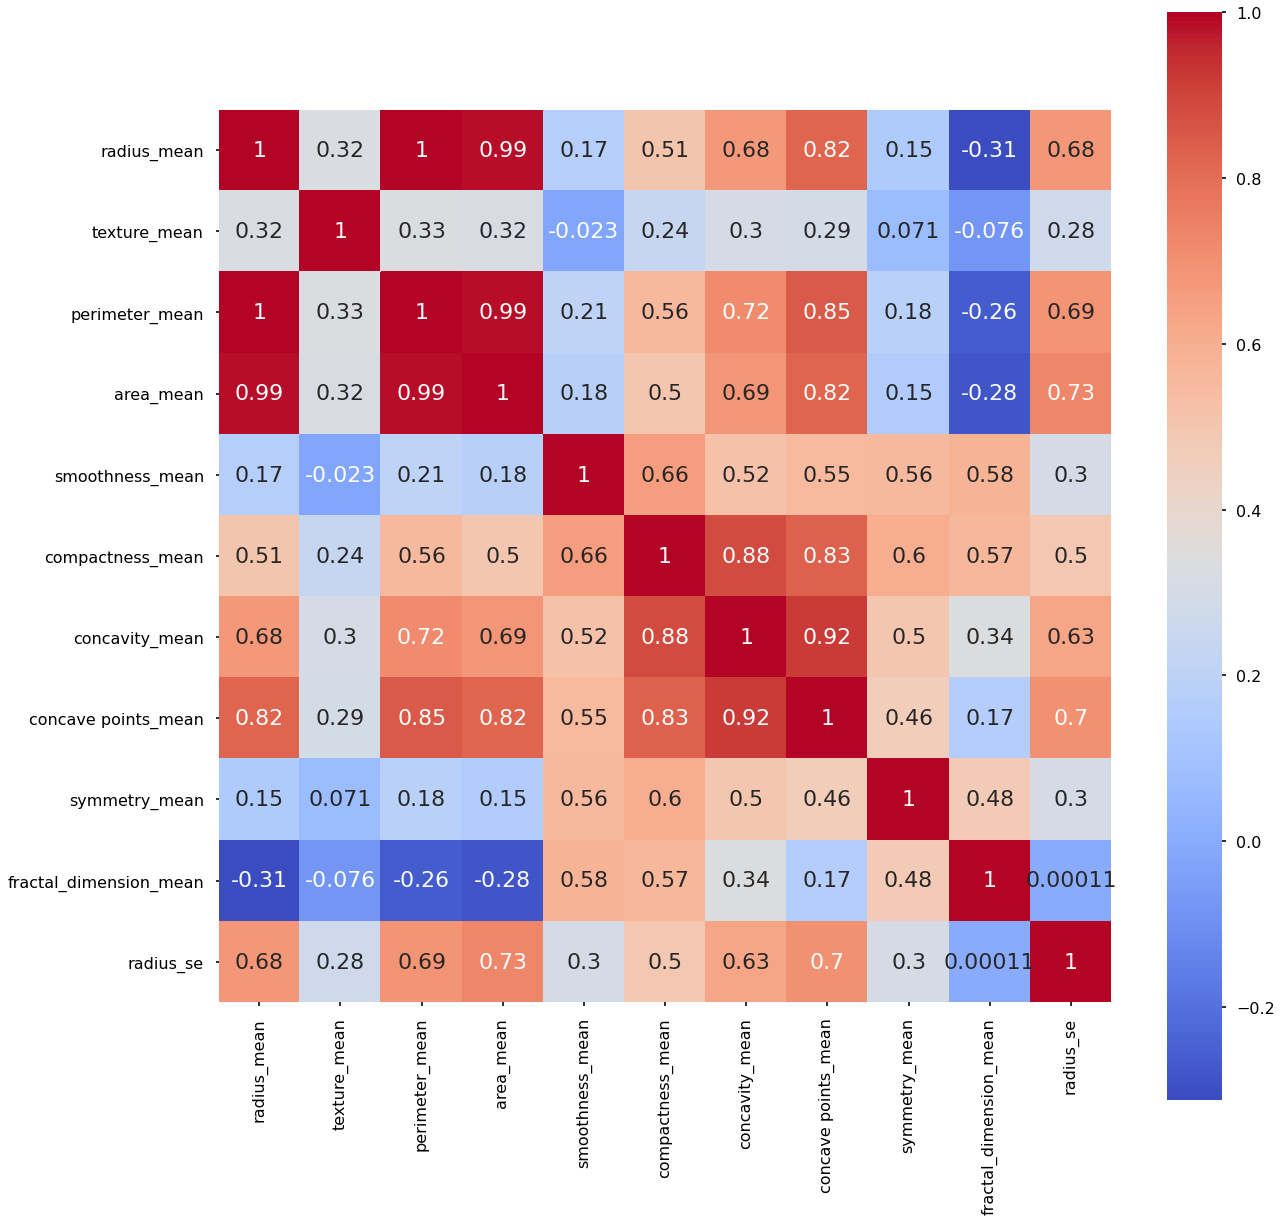

In [115]:
# plotting correlation between the mean features for further analysis
correlation = df[mean_features].corr()
# custom figure size for plot
plt.figure(figsize=(20,20))
# heatmap plot to represent correlation
sns.heatmap(correlation, annot=True, square=True, cmap='coolwarm')
plt.show()

# Creation of X and Y for training the machine learning models.

**Label encoder converts the 2 text classification label (M & B) into numeric 1 and 0.** M label is translated to 1 and B label is translated to 0.

Splitting data into **train and test with 75:25** ratio

In [0]:
# dataframe X contains feature selected
X = feature_df
# dataframe Y contains the corresponding labels
y = df.loc[:, 'diagnosis']
# label encoding is performed to convert Benign (0) and Malignant (1) labels in numeric series
# converting text labels to 2 class - 0 & 1
label_Y = LabelEncoder()
Y = label_Y.fit_transform(y)
# splitting data for training the classifiers and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 500)

Using **MinMaxScaler** to normalize the train and test features

In [0]:
# scaling and normalization of X_train and X_test
# This estimator scales and translates each feature individually such that it is in the range 0-1
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

lists used for plotting the accuracy comparison.

In [0]:
# lists used for accuracy plots
accuracy_list = []
cv_accuracy_list = []
model_list = []

# **Random Forest Classifier**

In [119]:
# training Random Forest Classifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 500)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=500,
                       verbose=0, warm_start=False)

**Predictions and Results** using Random Forest Classifer

In [120]:
# prediction of labels for the test data
y_pred = classifier_rf.predict(X_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_score = round(Decimal(accuracy_score(y_test, y_pred) * 100), 2)
accuracy_list.append(acc_score)
model_list.append("RF")
print("Classification Report")
print(classification_report(y_test, y_pred))
print(f"Accuracy (RF Classifier with MinMax Scaling) = {acc_score}")

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.98      0.98      0.98        48

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

Accuracy (RF Classifier with MinMax Scaling) = 98.60


**Cross validation accuracy** for Random Forest Classifier with **5 folds of 80:20 splits of dataset** into train and test.

In [121]:
# performing cross validation with 5 different splits
scores = cross_val_score(classifier_rf, X, y, cv=5)
# mean of cross val score (accuracy)
scores_mean = round(Decimal(scores.mean()*100), 2)
cv_accuracy_list.append(scores_mean)
print(f"Cross Validation Accuracy (RF Classifier with MinMax Scaling) = {scores_mean}")

Cross Validation Accuracy (RF Classifier with MinMax Scaling) = 95.43


# **K-Nearest Neighbor Classifier**

In [122]:
# training KNN classifier
classifier_knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance', n_jobs = 4)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=7, p=2,
                     weights='distance')

**Prediction and Results** using K-Nearest Neighbor Classifier

In [123]:
# prediction of labels for the test data
y_pred = classifier_knn.predict(X_test)
# calculation of accuracy score based on predictions performed
acc_score = round(Decimal(accuracy_score(y_test, y_pred) * 100), 2)
accuracy_list.append(acc_score)
model_list.append("KNN")
print("Classification Report")
print(classification_report(y_test, y_pred))
print(f"Accuracy (KNN Classifier with MinMax Scaling) = {acc_score}")

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.98      0.98      0.98        48

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

Accuracy (KNN Classifier with MinMax Scaling) = 98.60


**Cross Validation accuracy** for K-Nearest Neighbor Classifier with **5 folds of 80:20 splits of dataset** into train and test.

In [124]:
# performing cross validation with 5 different splits
scores = cross_val_score(classifier_knn, X, y, cv=5)
# mean of cross val score (accuracy)
scores_mean = round(Decimal(scores.mean()*100), 2)
cv_accuracy_list.append(scores_mean)
print(f"Cross Validation Accuracy (KNN Classifier with MinMax Scaling) = {scores_mean}")

Cross Validation Accuracy (KNN Classifier with MinMax Scaling) = 92.44


# **Logistic Regression Classifier**

In [125]:
# training logistic regression
classifier_lr = LogisticRegression(random_state=500)
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=500, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Prediction and Results** using Logistic Regression Classifier

In [126]:
# prediction of labels for the test data
y_pred = classifier_lr.predict(X_test)
# calculation of accuracy score based on predictions performed
acc_score = round(Decimal(accuracy_score(y_test, y_pred) * 100), 2)
accuracy_list.append(acc_score)
model_list.append("LR")
print("Classification Report")
print(classification_report(y_test, y_pred))
print(f"Accuracy (LR Classifier with MinMax Scaling) = {acc_score}")

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.96      0.98      0.97        48

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy (LR Classifier with MinMax Scaling) = 97.90


**Cross Validation accuracy** for Logistic Regression Classifier with **5 folds of 80:20 splits of dataset** into train and test.

In [127]:
# performing cross validation with 5 different splits
scores = cross_val_score(classifier_lr, X, y, cv=5)
# mean of cross val score (accuracy)
scores_mean = round(Decimal(scores.mean()*100), 2)
cv_accuracy_list.append(scores_mean)
print(f"Cross Validation Accuracy (LR Classifier with MinMax Scaling) = {scores_mean}")

Cross Validation Accuracy (LR Classifier with MinMax Scaling) = 94.20


# **Support Vector Machine Classifier**

In [128]:
# parameter grid used for training and tuning SVM classifier
param_grid = {'C': [0.1, 1, 10, 40, 100, 200, 500, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0008, 0.000009, 1e-010], 
              'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 40, 100, 200, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0008, 9e-06,
                                   1e-10],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Printing the best parameters found

In [129]:
# print best parameter after tuning 
print(grid_svm.best_params_) 
  
# print how the model looks after hyper-parameter tuning 
print(grid_svm.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**Predictions and Results** using Support Vector Machine Classifier

In [130]:
# prediction of labels for the test data
grid_predictions = grid_svm.predict(X_test)
# calculation of accuracy score based on predictions performed
acc_score = round(Decimal(accuracy_score(y_test, grid_predictions) * 100), 2)
accuracy_list.append(acc_score)
model_list.append("SVM")
print("Classification Report")
print(classification_report(y_test, grid_predictions))
print(f"Accuracy (SVM Classifier with MinMax Scaling) = {acc_score}")

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.98      1.00      0.99        48

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy (SVM Classifier with MinMax Scaling) = 99.30


In [131]:
classifier_svm = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
classifier_svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Cross Validation accuracy** of Support Vector Machine classifier with **5 folds of 80:20 splits of dataset** into train and test.

In [132]:
# performing cross validation with 5 different splits
scores = cross_val_score(classifier_svm, X, y, cv=5)
# mean of cross val score (accuracy)
scores_mean = round(Decimal(scores.mean()*100), 2)
cv_accuracy_list.append(scores_mean)
print(f"Cross Validation Accuracy (SVM Classifier with MinMax Scaling) = {scores_mean}")

Cross Validation Accuracy (SVM Classifier with MinMax Scaling) = 95.08


# **Multilayer Perceptron Classifier**

In [133]:
# training MLP Neural Network
classifier = Sequential()
# input layer with 64 neurons & shape (30, ) which is equal to number of features
classifier.add(Dense(64, activation='relu', input_shape=(30, )))
# hidden layer with 64 neurons
classifier.add(Dense(64, activation='relu'))
# output layer with a single neuron with activation function sigmoid
# reason for choosing sigmoid function is that it is most suitable for binary classification
# as it predicts the class with some probability value that is guaranteed to lie between 0 and 1
classifier.add(Dense(1, activation='sigmoid'))
# compiling the network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
# classifier run for 50 iterations (epochs)
history = classifier.fit(X_train,y_train, batch_size=10, epochs=50) 

Epoch 1/50
426/426 [==============================] - 0s 339us/step - loss: 0.6296 - accuracy: 0.8099
Epoch 2/50
426/426 [==============================] - 0s 115us/step - loss: 0.4465 - accuracy: 0.8638
Epoch 3/50
426/426 [==============================] - 0s 118us/step - loss: 0.2792 - accuracy: 0.9014
Epoch 4/50
426/426 [==============================] - 0s 131us/step - loss: 0.2041 - accuracy: 0.9272
Epoch 5/50
426/426 [==============================] - 0s 137us/step - loss: 0.1733 - accuracy: 0.9390
Epoch 6/50
426/426 [==============================] - 0s 125us/step - loss: 0.1456 - accuracy: 0.9390
Epoch 7/50
426/426 [==============================] - 0s 119us/step - loss: 0.1302 - accuracy: 0.9577
Epoch 8/50
426/426 [==============================] - 0s 117us/step - loss: 0.1143 - accuracy: 0.9601
Epoch 9/50
426/426 [==============================] - 0s 141us/step - loss: 0.1167 - accuracy: 0.9507
Epoch 10/50
426/426 [==============================] - 0s 114us/step - loss: 0.107

Plotting **training accuracy and training loss curves**

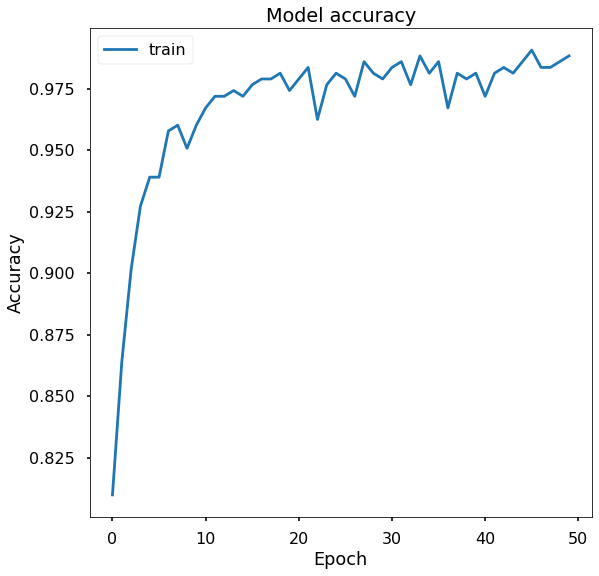

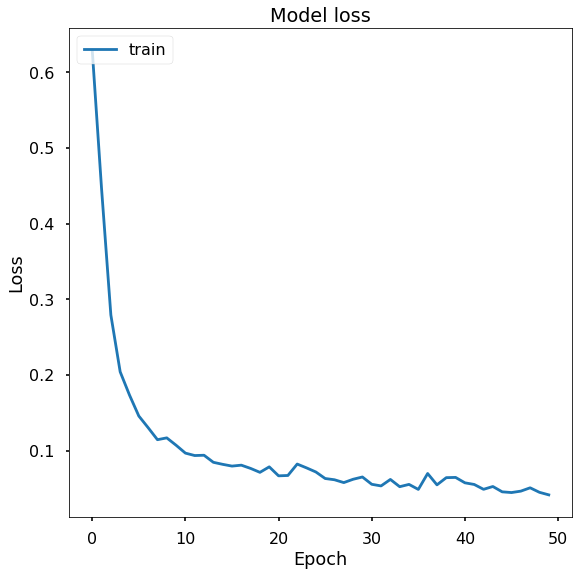

In [134]:
plt.figure(figsize=(9, 9))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.figure(figsize=(9, 9))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

**Predictions and Results** for Multilayer Perceptron

In [135]:
# predictions performed by MLP NN
predictions = classifier.predict(X_test)
# converting prediction probabilities into their appropriate labels
prediction_labels = []
# if predicted probability score is less than 0.50 it belongs to class 0 else class 1
for i in predictions:
  if i <= 0.50:
    class_label = 0
    prediction_labels.append(class_label)
  else:
    class_label = 1
    prediction_labels.append(class_label)
# calculation of accuracy score based on predictions performed
acc_score = round(Decimal(accuracy_score(y_test, prediction_labels) * 100), 2)
accuracy_list.append(acc_score)
model_list.append("MLP")
print("Classification Report")
print(classification_report(y_test, prediction_labels))
print(f"Accuracy (MLP Classifier with MinMax Scaling) = {acc_score}")

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        95
           1       0.94      1.00      0.97        48

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy (MLP Classifier with MinMax Scaling) = 97.90


**Cross Validation accuracy** of Multilayer Perceptron Classifier with **5 folds of 80:20 splits of dataset** into train and test.

In [136]:
# k fold cross validation with 5 folds
mlp_cv_acc = []
kf = StratifiedKFold(5, shuffle=True, random_state=500)
for train, test in kf.split(X, Y):
  X_train = X.iloc[train]
  y_train = Y[train]
  X_test = X.iloc[test]
  y_test = Y[test]
  classifier.fit(X_train,y_train, batch_size=10, epochs=50)
  # predictions performed by MLP NN
  predictions = classifier.predict(X_test)
  # converting prediction probabilities into their appropriate labels
  prediction_labels = []
  # if predicted probability score is less than 0.50 it belongs to class 0 else class 1
  for i in predictions:
    if i <= 0.50:
      class_label = 0
      prediction_labels.append(class_label)
    else:
      class_label = 1
      prediction_labels.append(class_label)
  # calculation of accuracy score based on predictions performed
  acc_score = round(accuracy_score(y_test, prediction_labels) * 100, 2)
  mlp_cv_acc.append(acc_score)
cv_accuracy_list.append(round(Decimal(mean(mlp_cv_acc)), 2))

Epoch 1/50
455/455 [==============================] - 0s 113us/step - loss: 359.4475 - accuracy: 0.6220
Epoch 2/50
455/455 [==============================] - 0s 121us/step - loss: 5.1407 - accuracy: 0.8593
Epoch 3/50
455/455 [==============================] - 0s 118us/step - loss: 4.2976 - accuracy: 0.8725
Epoch 4/50
455/455 [==============================] - 0s 119us/step - loss: 3.8656 - accuracy: 0.8791
Epoch 5/50
455/455 [==============================] - 0s 118us/step - loss: 3.9050 - accuracy: 0.8527
Epoch 6/50
455/455 [==============================] - 0s 121us/step - loss: 3.3378 - accuracy: 0.8857
Epoch 7/50
455/455 [==============================] - 0s 114us/step - loss: 2.7293 - accuracy: 0.8989
Epoch 8/50
455/455 [==============================] - 0s 153us/step - loss: 2.4404 - accuracy: 0.8945
Epoch 9/50
455/455 [==============================] - 0s 115us/step - loss: 2.6030 - accuracy: 0.8857
Epoch 10/50
455/455 [==============================] - 0s 140us/step - loss: 2.7

In [0]:
df = pd.read_csv("/content/drive/My Drive/Python Project data/BDMH_Project/wdbc.csv")
df.drop(df.columns[-1], axis=1, inplace=True)
feature_df = df.iloc[:, 1:]
pred = pd.get_dummies(feature_df["diagnosis"],prefix='diag')
pred.drop(pred.columns[0], axis=1, inplace=True) ## M=1, B= 0
pred.columns = ['diagnosis']
feature_df = feature_df.iloc[:,1:]
feature_df['diagnosis'] = pred

Preparation of tabular data bunch for FastAI learning

In [0]:
sc = MinMaxScaler()
train = pd.DataFrame(sc.fit_transform(feature_df))
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-142, len(df))
dep_var = 'diagnosis'
data = TabularDataBunch.from_df(path='.', df=df, dep_var=dep_var, valid_idx=valid_idx, procs=procs, cat_names=[])

In [139]:
data.show_batch(rows=10)

concavity_mean,smoothness_se,texture_worst,area_se,area_worst,texture_mean,concavity_se,symmetry_worst,smoothness_worst,concavity_worst,radius_se,texture_se,compactness_mean,symmetry_se,radius_mean,compactness_worst,fractal_dimension_se,smoothness_mean,perimeter_se,fractal_dimension_worst,perimeter_mean,perimeter_worst,concave points_se,concave points_mean,fractal_dimension_mean,compactness_se,symmetry_mean,concave points_worst,id,area_mean,radius_worst,target
0.3345,0.7889,-1.2440,1.8072,1.0344,-0.7302,0.3319,-0.7888,-0.8831,-0.2468,2.1144,-1.0644,0.2330,1.1698,1.4064,-0.3541,-0.1696,-0.7129,1.9927,-1.1670,1.3821,1.1210,2.5249,1.1638,-1.5515,0.2402,-0.3206,0.8970,-0.1619,1.4047,1.1368,M
-0.8872,-0.2897,1.0346,-0.5427,-0.7410,1.3547,-0.5104,0.4359,-1.6124,-0.9732,-0.6021,1.0895,-0.8959,1.2125,-0.7406,-0.7538,-0.5769,-1.5960,-0.4853,-0.9027,-0.7543,-0.7984,-0.7834,-0.9502,-0.5637,-0.1409,0.3656,-1.0321,-0.2353,-0.6998,-0.8208,B
0.9469,-0.3889,1.3976,0.6489,1.3586,1.3621,0.3037,0.5414,1.1004,1.7824,0.6295,-0.3029,1.4147,-0.6622,0.8435,2.9286,0.8698,0.7465,0.3773,2.6527,0.8857,1.2682,-0.1085,0.7278,0.2933,1.5995,0.3373,1.0787,-0.2356,0.7573,1.4001,M
2.4464,0.7636,-0.1946,0.2246,0.0239,0.0697,2.0513,1.9664,0.9498,1.9267,0.3745,0.2260,2.3931,3.8543,0.4333,1.4954,1.2346,1.9916,0.2645,1.1064,0.5944,0.3204,1.7177,1.8605,1.8636,2.1000,1.9221,1.4301,-0.2352,0.2714,0.1835,M
1.8365,0.4854,0.0397,1.1914,1.7978,0.2160,1.0848,-0.3209,1.6383,2.6894,1.2659,-0.7907,1.4495,-0.7297,1.5592,2.0502,1.2095,0.6814,0.5801,2.4280,1.5627,1.5096,1.2248,1.1823,0.5888,1.3028,-0.3489,1.9840,-0.2353,1.5441,1.8002,M
-0.6316,-1.1085,-0.1220,-0.4962,-0.4876,-0.1571,0.0585,0.3793,-1.7054,-0.5581,-0.6583,0.1793,-0.4909,0.5805,-0.3559,-0.1697,-0.0482,-1.6851,-0.2696,-0.6341,-0.3461,-0.3592,-0.2065,-0.8060,-0.5341,0.5895,0.1499,-0.7651,-0.2352,-0.3926,-0.4758,B
0.2376,-0.4861,1.1072,0.2944,1.3708,0.8670,-0.1702,0.3579,-0.0312,0.5084,0.0672,-0.2431,0.6782,-0.7882,1.4036,1.8342,-0.1572,-0.8367,0.4406,0.4221,1.4314,1.7038,0.0400,0.4312,-1.0548,0.5815,-0.2286,0.7942,-0.2354,1.3791,1.4083,M
0.1505,-0.6986,1.0445,0.0494,0.4766,0.6354,-0.3195,0.7968,0.2829,0.0966,0.0582,0.1158,0.4144,-0.6532,0.5493,0.2801,-0.5196,0.2905,-0.0485,-0.4351,0.5574,0.6236,-0.4306,0.1379,-0.5454,-0.3452,1.1615,0.2046,0.5704,0.4170,0.6142,M
0.7211,-0.1804,1.2871,1.0603,0.8025,0.5037,0.3804,-0.5136,0.5153,0.5343,1.4473,1.7306,-0.0033,-0.3226,0.8039,-0.3315,-0.0383,1.0940,1.5500,-0.4458,0.7872,1.0209,0.8662,1.2314,-0.2921,-0.4275,-0.3701,0.9714,0.5987,0.7265,0.9245,M
-0.4995,0.6926,0.6271,-0.5846,-0.6685,0.5671,-0.2508,-0.1986,1.5909,0.1570,-0.6630,-0.4055,-0.7334,-0.6161,-0.8141,-0.2442,-0.4828,-0.6658,-0.6653,0.2139,-0.8261,-0.7219,-0.8723,-0.8019,0.3524,-0.5549,-1.2191,-0.5165,-0.2355,-0.7587,-0.7045,B


# **FastAI Classifier**

epoch,train_loss,valid_loss,accuracy,time
0,0.348418,0.335465,0.971831,00:00
1,0.211926,0.106551,0.964789,00:00
2,0.154751,0.070890,0.978873,00:00
3,0.125635,0.071737,0.978873,00:00
4,0.104333,0.062754,0.985915,00:00
5,0.099315,0.060573,0.985915,00:00
6,0.093752,0.082657,0.985915,00:00
7,0.087637,0.081066,0.985915,00:00
8,0.081830,0.073613,0.992958,00:00
9,0.072278,0.071245,0.992958,00:00


Accuracy (FastAI Classifier with MinMax Scaling) = 99.30


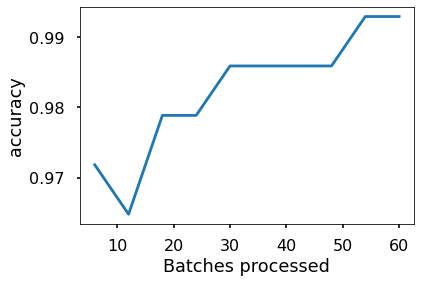

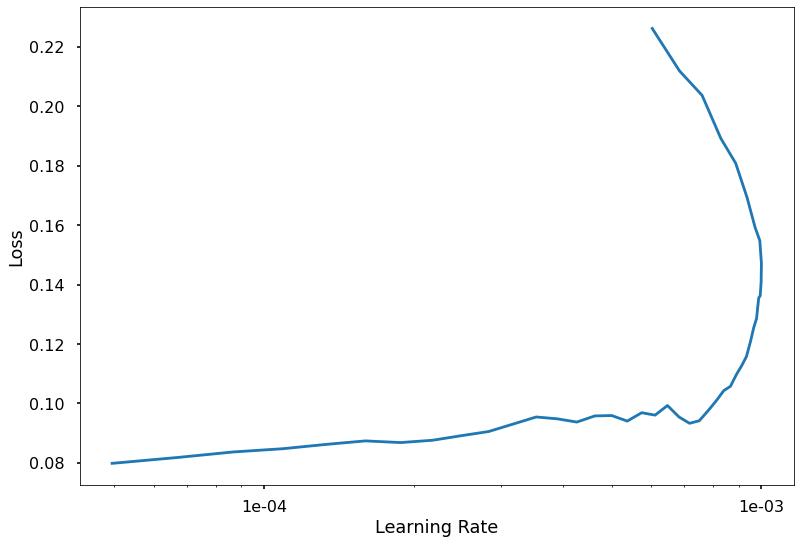

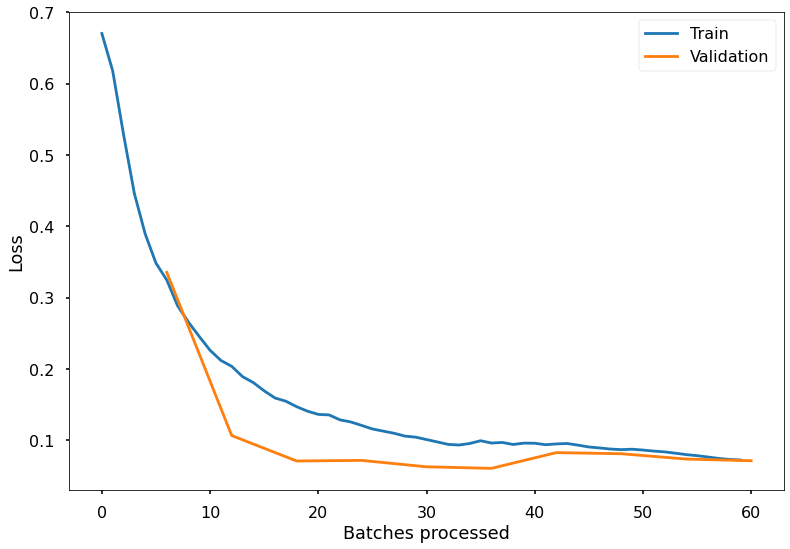

In [140]:
learned = tabular_learner(data, layers=[2000,500], emb_drop=0.1, metrics=accuracy)
learned.fit_one_cycle(10, max_lr=slice(1e-03))
learned.recorder.plot_metrics()
learned.recorder.plot()
learned.recorder.plot_losses() 
acc_score = round(Decimal(float(learned.recorder.metrics[-1][0])) * 100, 2)
accuracy_list.append(acc_score)
model_list.append("FastAI")
print(f"Accuracy (FastAI Classifier with MinMax Scaling) = {acc_score}")

**Cross Validation accuracy** of FastAI classifier with **5 folds of 80:20 splits of dataset** into train and test.

In [141]:
sc = MinMaxScaler()
train = pd.DataFrame(sc.fit_transform(feature_df))
procs = [FillMissing, Categorify, Normalize]
dep_var = 'diagnosis'
fastai_cv_acc = []
for i in range(5):
  df = shuffle(df)
  valid_idx = range(len(df)-114, len(df))
  data = TabularDataBunch.from_df(path='.', df=df, dep_var=dep_var, valid_idx=valid_idx, procs=procs, cat_names=[])
  learned = tabular_learner(data, layers=[2000,500], emb_drop=0.1, metrics=accuracy)
  learned.fit_one_cycle(10, max_lr=slice(1e-03))
  acc_score = round(float(learned.recorder.metrics[-1][0]) * 100, 2)
  fastai_cv_acc.append(acc_score)
cv_accuracy_list.append(round(Decimal(mean(fastai_cv_acc)), 2))

epoch,train_loss,valid_loss,accuracy,time
0,0.350707,0.298147,0.947368,00:00
1,0.226472,0.064292,0.982456,00:00
2,0.156480,0.047186,0.991228,00:00
3,0.131472,0.056534,0.991228,00:00
4,0.109444,0.053676,0.991228,00:00
5,0.091758,0.050198,0.991228,00:00
6,0.078499,0.044001,0.991228,00:00
7,0.072570,0.045766,0.982456,00:00
8,0.074007,0.049310,0.982456,00:00
9,0.066434,0.049091,0.982456,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.427829,0.332494,0.885965,00:00
1,0.256669,0.107032,0.956140,00:00
2,0.200759,0.076309,0.973684,00:00
3,0.155861,0.058743,0.991228,00:00
4,0.131490,0.062400,0.964912,00:00
5,0.128485,0.053568,0.964912,00:00
6,0.112107,0.051429,0.982456,00:00
7,0.098226,0.049659,0.991228,00:00
8,0.087070,0.048694,0.991228,00:00
9,0.081303,0.047823,0.991228,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.325008,0.284643,0.947368,00:00
1,0.217392,0.072045,0.982456,00:00
2,0.162873,0.023240,1.000000,00:00
3,0.133396,0.018583,1.000000,00:00
4,0.112046,0.022610,1.000000,00:00
5,0.097105,0.024303,1.000000,00:00
6,0.083671,0.030299,1.000000,00:00
7,0.074443,0.026724,1.000000,00:00
8,0.068557,0.025342,1.000000,00:00
9,0.063636,0.026848,1.000000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.318824,0.293155,0.956140,00:00
1,0.198346,0.074901,0.982456,00:00
2,0.148691,0.039954,0.991228,00:00
3,0.118678,0.039461,0.982456,00:00
4,0.096130,0.033910,0.991228,00:00
5,0.080282,0.025482,1.000000,00:00
6,0.069878,0.029913,0.991228,00:00
7,0.065422,0.050528,0.982456,00:00
8,0.060412,0.044624,0.982456,00:00
9,0.053439,0.046605,0.982456,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.334133,0.285263,0.982456,00:00
1,0.225900,0.082163,0.973684,00:00
2,0.161555,0.056969,0.982456,00:00
3,0.120429,0.058916,0.973684,00:00
4,0.096457,0.078260,0.973684,00:00
5,0.081616,0.091617,0.956140,00:00
6,0.071043,0.098491,0.964912,00:00
7,0.062539,0.079127,0.973684,00:00
8,0.055527,0.076916,0.973684,00:00
9,0.050135,0.077823,0.973684,00:00


# **Model vs Accuracy comparison plot**

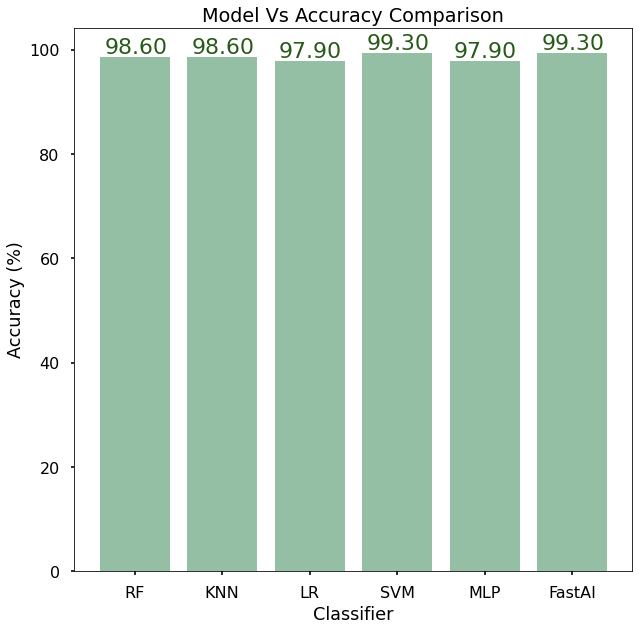

In [142]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
plt.rcParams.update({'font.size': 22})
plt.title("Model Vs Accuracy Comparison")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='#95BFA5')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.35, float(j)+0.7, str(j), color='#275918')
plt.show()

# **Model vs Cross Validation Accuracy comparison plot**

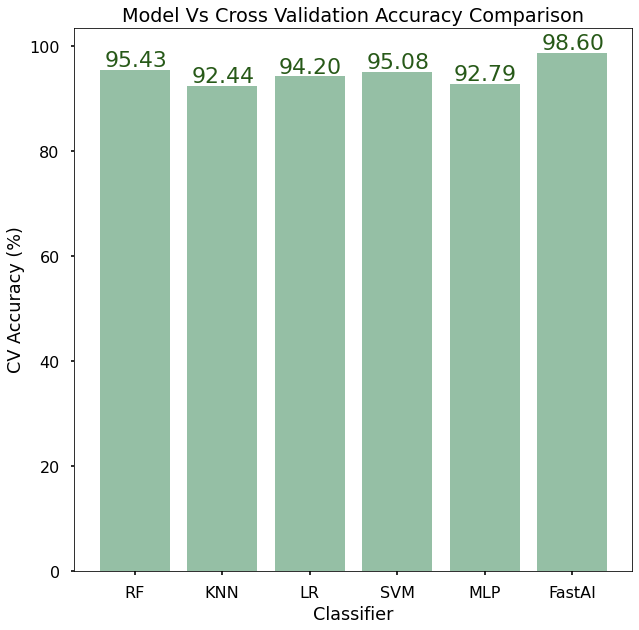

In [143]:
# comparison plot for all classifiers with their cross validation accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
plt.rcParams.update({'font.size': 22})
plt.title("Model Vs Cross Validation Accuracy Comparison")
plt.xlabel('Classifier')
plt.ylabel('CV Accuracy (%)')
plt.bar(model_list, cv_accuracy_list, color='#95BFA5')
for i, j in enumerate(cv_accuracy_list):
    ax.text(float(i)-0.35, float(j)+0.7, str(j), color='#275918')
plt.show()